In [1]:
import keras

Using TensorFlow backend.


In [2]:
from glob import glob 
from skimage.io import imread
import gc

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import shutil


import os
import pandas as pd
import numpy as np
import PIL
import matplotlib
import matplotlib.pyplot as plt
from keras.models import load_model,save_model
from keras.callbacks import ModelCheckpoint
from matplotlib.patches import Rectangle
import os
from scipy.misc import imsave
from tqdm import tqdm

import keras

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.preprocessing import image
from keras.applications import xception
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import BatchNormalization
from keras.optimizers import SGD, Adam,Adagrad
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.layers.advanced_activations import LeakyReLU
from math import sqrt
from keras.callbacks import History 
from keras.optimizers import Adam, SGD
from keras.layers import Activation
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.layers.advanced_activations import LeakyReLU
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.preprocessing import image
from keras.applications import xception
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, merge, GlobalAveragePooling2D, MaxPool2D, GlobalMaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense,Input, Concatenate
from keras.layers import BatchNormalization
from keras.models import Model
from keras.activations import relu
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.advanced_activations import ELU
import keras.backend as K
from math import sqrt
from keras.callbacks import History 

from keras.applications import ResNet50, VGG19, NASNetMobile,DenseNet169
import gc
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
from glob import glob
from random import shuffle
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution1D, concatenate, SpatialDropout1D, GlobalMaxPool1D, GlobalAvgPool1D, Embedding, \
    Conv2D, SeparableConv1D, Add, BatchNormalization, Activation, GlobalAveragePooling2D, LeakyReLU, Flatten
from keras.layers import Dense, Input, Dropout, MaxPooling2D, Concatenate, GlobalMaxPooling2D, GlobalAveragePooling2D, \
    Lambda, Multiply, LSTM, Bidirectional, PReLU, MaxPooling1D
from keras.layers.pooling import _GlobalPooling1D
from keras.losses import mae, sparse_categorical_crossentropy, binary_crossentropy
from keras.models import Model
# from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.applications.densenet import DenseNet169, preprocess_input
from keras.optimizers import Adam, RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from imgaug import augmenters as iaa
import imgaug as ia
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.preprocessing import image
from keras.applications import xception
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import BatchNormalization
from keras.optimizers import SGD, Adam,Adagrad
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.layers.advanced_activations import LeakyReLU
from math import sqrt
from keras.callbacks import History 
from keras.optimizers import Adam, SGD
from keras.layers import Activation
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.layers.advanced_activations import LeakyReLU
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.preprocessing import image
from keras.applications import xception
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, merge, GlobalAveragePooling2D, MaxPool2D
from keras.layers import Activation, Dropout, Flatten, Dense,Input
from keras.layers import BatchNormalization
from keras.models import Model
from keras.activations import relu
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.advanced_activations import ELU
import keras.backend as K
from math import sqrt
from keras.callbacks import History
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.preprocessing import image
from keras.applications import xception
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import BatchNormalization
from keras.optimizers import SGD, Adam,Adagrad
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.layers.advanced_activations import LeakyReLU
from math import sqrt
from keras.callbacks import History 
from keras.optimizers import Adam, SGD
from keras.layers import Activation
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
from keras.layers.advanced_activations import LeakyReLU
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.preprocessing import image
from keras.applications import xception
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, merge, GlobalAveragePooling2D, MaxPool2D, GlobalMaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense,Input, Concatenate
from keras.layers import BatchNormalization
from keras.models import Model
from keras.activations import relu
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.advanced_activations import ELU
import keras.backend as K
from math import sqrt
from keras.callbacks import History 

from keras.applications import ResNet50, VGG19, NASNetMobile,DenseNet169
import gc

import pandas as pd
import numpy as np
import math
from glob import glob
import os
from scipy.misc import imread

In [3]:
trainPath = '/home/santhosr/Documents/Courses/CancerTissue/train'
df = pd.read_csv("/home/santhosr/Documents/Courses/CancerTissue/train_labels.csv")

df = df[df['id'] != 'dd6dfed324f9fcb6f93f46f32fc800f2ec196be2']
df = df[df['id'] != '9369c7278ec8bcc6c880d99194de09fc2bd4efbe']

def read_img(filepath, size,grayscale=False):
    
    if grayscale:
        img = image.load_img((filepath), target_size=size,grayscale=True)
        img = image.img_to_array(img,data_format='channels_last')
    else:
        img = image.load_img((filepath), target_size=size)
        img = image.img_to_array(img,data_format='channels_last')
    return img


lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.1, epsilon=1e-5, patience=3, verbose=1)

modelID=0
checkPoint = ModelCheckpoint(filepath='./model_densenet_{epoch:02d}_{val_loss:.4f}_{val_acc:4f}.hdf5',verbose=1,save_best_only=True,mode=min)
bestCheckPoint = ModelCheckpoint(filepath='./bestModel.hdf5',verbose=0,save_best_only=True,mode=min)

datagen = ImageDataGenerator(preprocessing_function=lambda x:(x - x.mean()) / x.std() if x.std() > 0 else x,
                            horizontal_flip=True,
                            vertical_flip=True,
                            validation_split=0.1)
                            
trainGen=datagen.flow_from_dataframe(df, trainPath, x_col='id',y_col='label',has_ext=False,target_size=(96,96),subset='training', class_mode='binary',shuffle=True)
valGen = datagen.flow_from_dataframe(df, trainPath, x_col='id',y_col='label',has_ext=False,target_size=(96,96),subset='validation', class_mode='binary',shuffle=True)

def conv_layer(feature_batch, feature_map, kernel_size=(3, 3),strides=(1,1), zp_flag=False):
    if zp_flag:
        zp = ZeroPadding2D((1,1))(feature_batch)
    else:
        zp = feature_batch
    conv = Conv2D(filters=feature_map, kernel_size=kernel_size, strides=strides)(zp)
    bn = BatchNormalization(axis=3)(conv)
    act = LeakyReLU(1/10)(bn)
    return act
    
    



/home/santhosr/.local/lib/python2.7/site-packages/keras/callbacks.py:1065: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '
/home/santhosr/.local/lib/python2.7/site-packages/keras/callbacks.py:407: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)


Found 198021 images belonging to 2 classes.
Found 22002 images belonging to 2 classes.


In [40]:
df_train = pd.read_csv("/home/santhosr/Documents/Courses/CancerTissue/train_labels.csv")
id_label_map = {k:v for k,v in zip(df_train.id.values, df_train.label.values)}
df_train.head()


def get_id_from_file_path(file_path):
    return file_path.split(os.path.sep)[-1].replace('.tif', '')
    
labeled_files = glob('/home/santhosr/Documents/Courses/CancerTissue/train/*.tif')
test_files = glob('/home/santhosr/Documents/Courses/CancerTissue/test/*.tif')

train, val = train_test_split(labeled_files, test_size=0.1)
val, test = train_test_split(val, test_size=0.5)

def chunker(seq, size):
    return (seq[pos:pos + size] for pos in range(0, len(seq), size))
def get_seq():
    sometimes = lambda aug: iaa.Sometimes(0.5, aug)
    seq = iaa.Sequential(
        [
            
            iaa.Fliplr(0.5), 
            iaa.Flipud(0.2), 
            sometimes(iaa.Affine(
                scale={"x": (0.9, 1.1), "y": (0.9, 1.1)}, 
                translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)}, 
                rotate=(-10, 10),
                shear=(-5, 5),
                order=[0, 1], 
                cval=(0, 255), 
                mode=ia.ALL 
            )),
            iaa.SomeOf((0, 5),
                [
                    sometimes(iaa.Superpixels(p_replace=(0, 1.0), n_segments=(20, 200))), 
                    iaa.OneOf([
                        iaa.GaussianBlur((0, 1.0)), 
                        iaa.AverageBlur(k=(3, 5)), 
                        iaa.MedianBlur(k=(3, 5)), 
                    ]),
                    iaa.Sharpen(alpha=(0, 1.0), lightness=(0.9, 1.1)), 
                    iaa.Emboss(alpha=(0, 1.0), strength=(0, 2.0)), 
                  
                    iaa.SimplexNoiseAlpha(iaa.OneOf([
                        iaa.EdgeDetect(alpha=(0.5, 1.0)),
                        iaa.DirectedEdgeDetect(alpha=(0.5, 1.0), direction=(0.0, 1.0)),
                    ])),
                    iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.01*255), per_channel=0.5), 
                    iaa.OneOf([
                        iaa.Dropout((0.01, 0.05), per_channel=0.5), 
                        iaa.CoarseDropout((0.01, 0.03), size_percent=(0.01, 0.02), per_channel=0.2),
                    ]),
                    iaa.Invert(0.01, per_channel=True), 
                    iaa.Add((-2, 2), per_channel=0.5), 
                    iaa.AddToHueAndSaturation((-1, 1)), 
                    iaa.OneOf([
                        iaa.Multiply((0.9, 1.1), per_channel=0.5),
                        iaa.FrequencyNoiseAlpha(
                            exponent=(-1, 0),
                            first=iaa.Multiply((0.9, 1.1), per_channel=True),
                            second=iaa.ContrastNormalization((0.9, 1.1))
                        )
                    ]),
                    sometimes(iaa.ElasticTransformation(alpha=(0.5, 3.5), sigma=0.25)), 
                    sometimes(iaa.PiecewiseAffine(scale=(0.01, 0.05))), 
                    sometimes(iaa.PerspectiveTransform(scale=(0.01, 0.1)))
                ],
                random_order=True
            )
        ],
        random_order=True
    )
    return seq

def data_gen(list_files, id_label_map, batch_size, augment=False):
    seq = get_seq()
    while True:
        shuffle(list_files)
        for batch in chunker(list_files, batch_size):
            X = [cv2.imread(x) for x in batch]
            Y = [id_label_map[get_id_from_file_path(x)] for x in batch]
            if augment:
                X = seq.augment_images(X)
            X = np.array([preprocess_input(x) for x in X])
            print(X.shape)
#             X  = X[:,32:64,32:64,:]
                
            yield np.array(X), np.array(Y)
            
    

In [5]:
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.1, epsilon=1e-5, patience=3, verbose=1)

modelID=0
checkPoint = ModelCheckpoint(filepath='./model_densenet_{epoch:02d}_{val_loss:.4f}_{val_acc:4f}.hdf5',verbose=1,save_best_only=False,mode=min)
bestCheckPoint = ModelCheckpoint(filepath='./bestModel.hdf5',verbose=0,save_best_only=True,mode=min)

datagen = ImageDataGenerator(preprocessing_function=lambda x:(x - x.mean()) / x.std() if x.std() > 0 else x,
                            horizontal_flip=True,
                            vertical_flip=True,
                            validation_split=0.1)
                            
def conv_layer(feature_batch, feature_map, kernel_size=(3, 3),strides=(1,1), zp_flag=False):
    if zp_flag:
        zp = ZeroPadding2D((1,1))(feature_batch)
    else:
        zp = feature_batch
    conv = Conv2D(filters=feature_map, kernel_size=kernel_size, strides=strides)(zp)
    bn = BatchNormalization(axis=3)(conv)
    act = LeakyReLU(1/10)(bn)
    return act

In [6]:
model = DenseNet169(include_top = False, input_shape=(96,96,3))

In [7]:
x = model.output

out1 = GlobalMaxPooling2D()(x)
out2 = GlobalAveragePooling2D()(x)
out3 = Flatten()(x)
out = Concatenate(axis=-1)([out1, out2, out3])
out = Dropout(0.4)(out)
out = Dense(256, activation="relu")(out)
predictions = Dense(1, activation="sigmoid")(out)

In [8]:
fullModel = Model(inputs=model.input, outputs=predictions)

adam = Adam(lr=0.00001)

fullModel.compile(loss="binary_crossentropy", optimizer=adam, metrics=["accuracy"])


In [33]:
### TRAINING

batch_size=64
h5_path = "model.h5"
checkpoint = ModelCheckpoint(h5_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

history = fullModel.fit_generator(
    data_gen(train, id_label_map, batch_size, augment=True),
    validation_data=data_gen(val, id_label_map, batch_size),
    epochs=2, verbose=1,
    callbacks=[checkpoint, lr_reduce, bestCheckPoint,checkPoint],
    steps_per_epoch=2000,
    validation_steps=200)




Epoch 1/2
(32, 96, 96, 3)
(32, 96, 96, 3)
(32, 96, 96, 3)
(32, 96, 96, 3)
(32, 96, 96, 3)
(32, 96, 96, 3)
(32, 96, 96, 3)
(32, 96, 96, 3)
(32, 96, 96, 3)
(32, 96, 96, 3)
(32, 96, 96, 3)
(32, 96, 96, 3)
(32, 96, 96, 3)
(32, 96, 96, 3)
(32, 96, 96, 3)
(32, 96, 96, 3)
(32, 96, 96, 3)
(32, 96, 96, 3)
(32, 96, 96, 3)
(32, 96, 96, 3)
(32, 96, 96, 3)
(32, 96, 96, 3)
(32, 96, 96, 3)
19/20 [===========================>..] - ETA: 2s - loss: 0.7961 - acc: 0.5033(32, 96, 96, 3)
(32, 96, 96, 3)
(32, 96, 96, 3)
(32, 96, 96, 3)
(32, 96, 96, 3)
(32, 96, 96, 3)
(32, 96, 96, 3)
(32, 96, 96, 3)
(32, 96, 96, 3)
(32, 96, 96, 3)
(32, 96, 96, 3)
(32, 96, 96, 3)
(32, 96, 96, 3)
(32, 96, 96, 3)
(32, 96, 96, 3)
(32, 96, 96, 3)
(32, 96, 96, 3)
(32, 96, 96, 3)
(32, 96, 96, 3)
(32, 96, 96, 3)
(32, 96, 96, 3)
(32, 96, 96, 3)
(32, 96, 96, 3)
(32, 96, 96, 3)
20/20 [==============================] - 49s 2s/step - loss: 0.7880 - acc: 0.5109 - val_loss: 0.6764 - val_acc: 0.5922

Epoch 00001: val_acc improved from -inf t

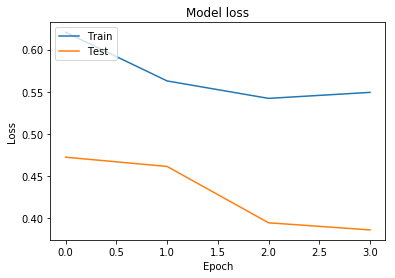

In [25]:
plt.plot(history.history['acc'] + history1.history['acc'])
plt.plot(history.history['val_acc'] + history1.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')


plt.savefig("acc.jpg")

plt.clf()
plt.close()

plt.plot(history.history['loss']+ history1.history['loss'])
plt.plot(history.history['val_loss']+ history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')


plt.savefig("loss.jpg")

In [22]:
import os
os.getcwd()

'/home/santhosr/Documents/Courses/CancerTissue/Keras'

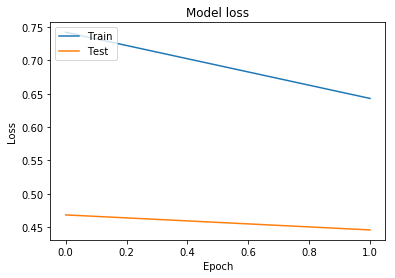

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Testing

In [103]:
model = fullModel.load_weights('/home/santhosr/Documents/Courses/CancerTissue/Keras/97/densenetImgaug/model_densenet_18_0.0816_0.972757.hdf5')

In [104]:
def data_gen2(list_files, id_label_map, batch_size, augment=False):
    seq = get_seq()
    while True:
#         shuffle(list_files)
        for batch in chunker(list_files, batch_size):
            
            X = [cv2.imread(x) for x in batch]
            Y = [id_label_map[get_id_from_file_path(x)] for x in batch]
            if augment:
                X = seq.augment_images(X)
            X = np.array([preprocess_input(x) for x in X])
            
#             X  = X[:,32:64,32:64,:]
                
            return np.array(X), np.array(Y)

In [105]:
predList = []
labelList = []
for i in tqdm(range(0,len(test),50)):
    fileName = test[i:(i+50)]
    
    x,y = data_gen2(fileName, id_label_map, batch_size=50, augment = False)
    pred = fullModel.predict(x)
    
    predList.append(pred)
    labelList.append(y)


100%|██████████| 221/221 [00:16<00:00, 13.53it/s]


In [106]:
predList = np.concatenate(predList,axis=0).reshape(-1)

In [107]:
labelList = np.concatenate(labelList,axis=0).reshape(-1)

In [108]:
ind = predList>=0.5

predListAcc = np.zeros(predList.shape)
predListAcc[ind] = 1.0

In [109]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score,confusion_matrix


In [110]:
roc_auc_score(y_score=predList,y_true=labelList)

0.994205883040405

In [111]:
confusion_matrix(predListAcc,labelList)

array([[6406,  173],
       [ 176, 4247]])

In [112]:
accuracy_score(predListAcc, labelList)

0.9682784948191238

In [113]:
df = pd.DataFrame({'score':predListAcc})
df.head()

,score
0,1.0
1,1.0
2,0.0
3,0.0
4,0.0


In [114]:
df.to_csv("pred5_densnet18.csv",index=False, index_label=False)

### Test Time Augmentation

In [72]:
def data_gen2(list_files, id_label_map, batch_size, augment=False):
    seq = get_seq()
    while True:
#         shuffle(list_files)
        for batch in chunker(list_files, batch_size):
            
            X = [cv2.imread(x) for x in batch]
            Y = [id_label_map[get_id_from_file_path(x)] for x in batch]
            if augment:
                X = seq.augment_images(X)
            X = np.array([preprocess_input(x) for x in X])
            
#             X  = X[:,32:64,32:64,:]
                
            return np.array(X), np.array(Y)

In [73]:
ttaSteps = 9

predList = []
labelList = []
for i in tqdm(range(len(test))):
    fileName = test[i]
    
    p=[]
    for j in range(ttaSteps):
        
        x,y = data_gen2([fileName], id_label_map, batch_size=1, augment = True)
        pred = fullModel.predict(x)
        p.append(pred[0])
    
    
    predList.append(p)
    labelList.append(y)


  0%|          | 2/11002 [00:00<57:45,  3.17it/s]  /opt/anaconda2/lib/python2.7/site-packages/skimage/segmentation/slic_superpixels.py:156: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  segments_z = grid_z[slices]
/opt/anaconda2/lib/python2.7/site-packages/skimage/segmentation/slic_superpixels.py:157: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  segments_y = grid_y[slices]
/opt/anaconda2/lib/python2.7/site-packages/skimage/segmentation/slic_superpixels.py:158: FutureWarning: Using a non-tuple sequence for multidimensional indexing is dep

In [77]:
predList = np.array(predList).reshape((11002,9))


In [84]:
labelList = np.array(labelList).reshape(-1)

In [79]:
predListB = predList.copy()

In [80]:
meanPredList = np.mean(predList, axis=1)

In [90]:
roc_auc_score(labelList,meanPredList )

0.9917656958302569

In [86]:
meanPredList

array([9.8904729e-01, 9.4599319e-01, 1.6004430e-01, ..., 8.2568685e-03,
       6.7182415e-04, 5.6529962e-03], dtype=float32)

In [88]:
labelList = labelList.astype('float')

In [121]:
ind = predList>=0.5

In [114]:
predListAcc = predList.copy()
predListAcc[ind] = 1.0
predListAcc[~ind] = 0.0

In [118]:
finalPred = []
for i in range(predListAcc.shape[0]):
    
    if np.sum(predListAcc[i,:])>=5:
        out = 1
    else:
        out = 0
    
    finalPred.append(out)
    
finalPred = np.array(finalPred)    

In [119]:
accuracy_score(finalPred, labelList)

0.9650063624795492

### Ensembling

In [116]:
df1 = pd.read_csv('pred1.csv')
df2 = pd.read_csv('pred2_densnet18.csv')
df3 = pd.read_csv('pred3_densnet1.csv')
df4 = pd.read_csv('pred4_densnet7.csv')
df5 = pd.read_csv('pred5_densnet18.csv')


In [123]:
finaldf = pd.concat([df1,df2,df3,df4,df5],axis=1)
finaldf.columns = ['score1','score2','score3','score4','score5']

In [157]:
# finaldf['count'] = finaldf.apply(lambda x : np.sum(x),axis=1)

finaldf['count'] = finaldf.apply(lambda x : 1*x.score1 + 1*x.score2 + 3*x.score3 + x.score4 + x.score5  ,axis=1)

In [158]:
finaldf['pred'] = finaldf['count'].apply(lambda x : 1 if x>=5 else 0)

In [159]:

accuracy_score(finaldf.pred, labelList)

0.9689147427740411

In [160]:
len(train)

198022

In [161]:
198022 + 11002 + 11002

220026

In [162]:
confusion_matrix(finaldf.pred,labelList)

array([[6434,  194],
       [ 148, 4226]])

In [164]:
(6434+4226)/float((len(labelList)))

0.9689147427740411

In [165]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

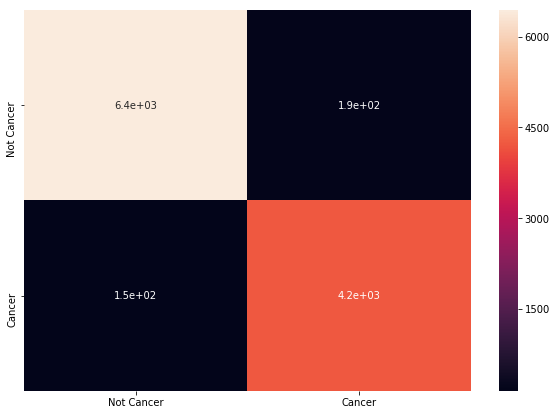

In [169]:
array = np.array([[6434,194],[148,4226]])
df_cm = pd.DataFrame(array, index = ["Not Cancer","Cancer"],
                  columns = ["Not Cancer","Cancer"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
